In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt
import numpy as np

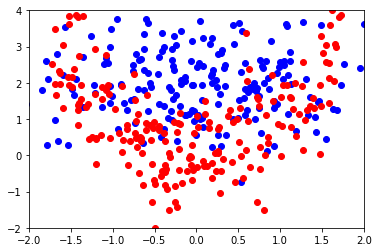

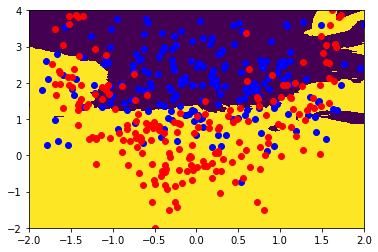

In [161]:
np.random.seed(666)
A = np.random.multivariate_normal([0, 2], 0.9*np.identity(2), size=200)
U = np.random.uniform(-1.75, 1.75, size=200)
B = np.array([[u, u**2 + 0.9*np.random.normal()] for u in U])
X = np.vstack([A, B])
y = np.concatenate([np.zeros(len(A)), np.ones(len(B))])
plt.plot(A[:,0], A[:,1], 'bo')
plt.plot(B[:,0], B[:,1], 'ro')
plt.xlim(-2, 2)
plt.ylim(-2, 4)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
R = KNeighborsClassifier(n_neighbors=19)
R.fit(X_train, y_train)
u = np.arange(-3, 3, 0.01)
v = np.arange(-3, 6, 0.01)
U, V = np.meshgrid(u, v)
uv = np.array([np.ndarray.flatten(U), np.ndarray.flatten(V)]).T
C = R.predict(uv).reshape(U.shape)
plt.pcolormesh(u, v, C)
plt.plot(A[:,0], A[:,1], 'bo')
plt.plot(B[:,0], B[:,1], 'ro')
plt.xlim(-2, 2)
plt.ylim(-2, 4)
plt.show()

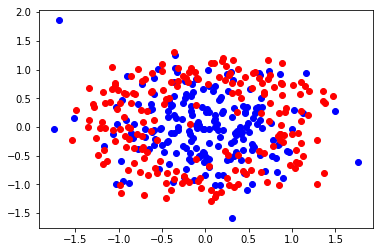

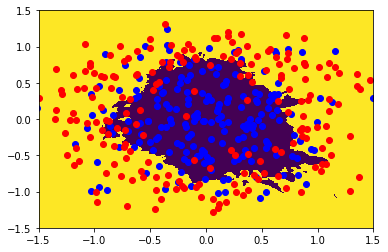

In [159]:
np.random.seed(666)
A = np.random.multivariate_normal([0, 0], 0.3*np.identity(2), size=200)
U = np.random.uniform(size=200)
B = np.array([[np.cos(2*np.pi*u) + 0.3*np.random.normal(), np.sin(2*np.pi*u) + 0.2*np.random.normal()] for u in U])
X = np.vstack([A, B])
y = np.concatenate([np.zeros(len(A)), np.ones(len(B))])
plt.plot(A[:,0], A[:,1], 'bo')
plt.plot(B[:,0], B[:,1], 'ro')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
R = KNeighborsClassifier(n_neighbors=19)
R.fit(X_train, y_train)
u = np.arange(-2, 2, 0.01)
v = np.arange(-2, 2, 0.01)
U, V = np.meshgrid(u, v)
uv = np.array([np.ndarray.flatten(U), np.ndarray.flatten(V)]).T
C = R.predict(uv).reshape(U.shape)
plt.pcolormesh(u, v, C)
plt.plot(A[:,0], A[:,1], 'bo')
plt.plot(B[:,0], B[:,1], 'ro')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [201]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

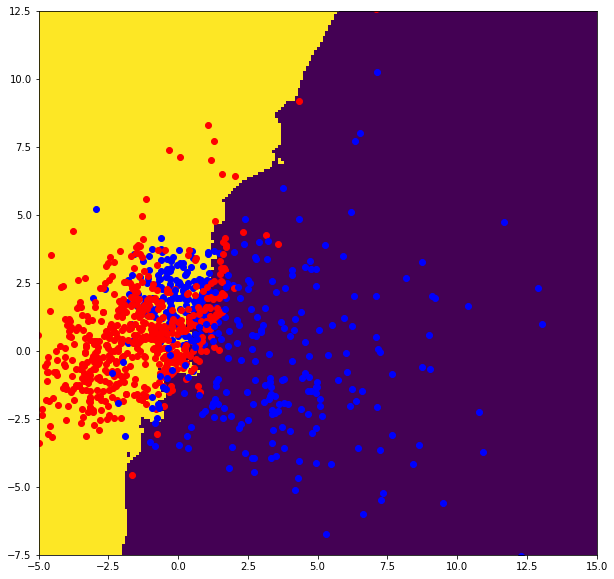

In [239]:
XX, y = load_breast_cancer(return_X_y=True)
X = (XX - XX.mean(axis=0))/XX.std(axis=0)
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
I = y == 1
J = y == 0

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)
R = KNeighborsClassifier(n_neighbors=10)
R.fit(X_train, y_train)
u = np.arange(-20, 20, 0.1)
v = np.arange(-10, 15, 0.1)
U, V = np.meshgrid(u, v)
uv = np.array([np.ndarray.flatten(U), np.ndarray.flatten(V)]).T
C = R.predict(uv).reshape(U.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(u, v, C)
plt.plot(A[:,0], A[:,1], 'bo')
plt.plot(B[:,0], B[:,1], 'ro')
plt.xlim(-5, 15)
plt.ylim(-7.5, 12.5)
plt.plot(X_new[I, 0], X_new[I, 1], 'ro')
plt.plot(X_new[J, 0], X_new[J, 1], 'bo')
plt.show()

In [236]:
np.argmax([cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, scoring="accuracy", cv=10).mean() for k in range(1,100)])

9

In [242]:
from sklearn.metrics import accuracy_score

y_pred = R.predict(X_new)
accuracy_score(y, y_pred)

0.9420035149384886

In [244]:
1 - np.abs(y - y_pred).sum()/len(y)

0.9420035149384886